In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("HousingData.csv")
#df.drop(columns=['Unnamed: 0'], axis=0, inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
# statistical info
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:


# check for null values
df.isnull().sum()



CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [34]:
df.fillna(44,inplace=True) 

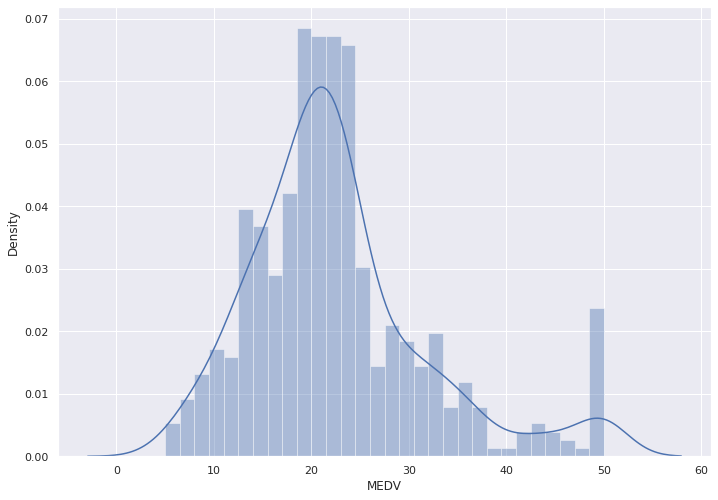

In [35]:

sns.set(rc={'figure.figsize':(11.7,8.27)})  # for setting aesthetic parameters
sns.distplot(df['MEDV'],bins=30)
plt.show()



<AxesSubplot:>

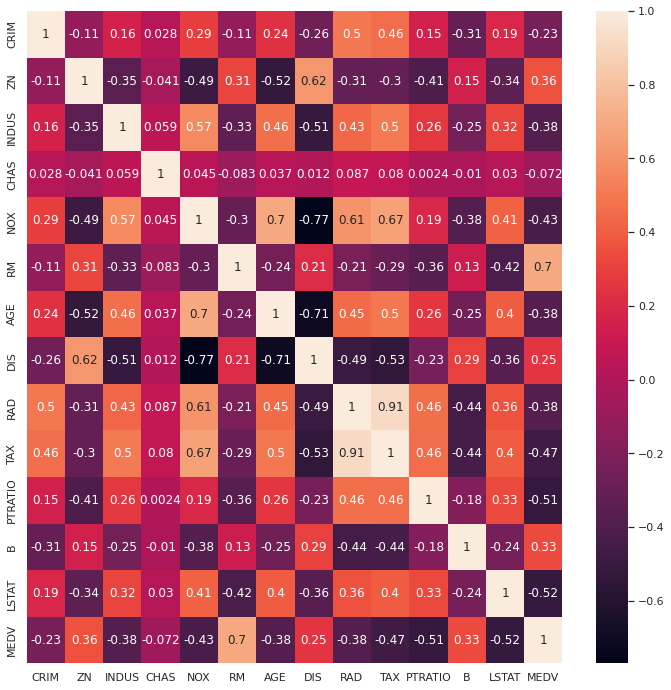

In [36]:

plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

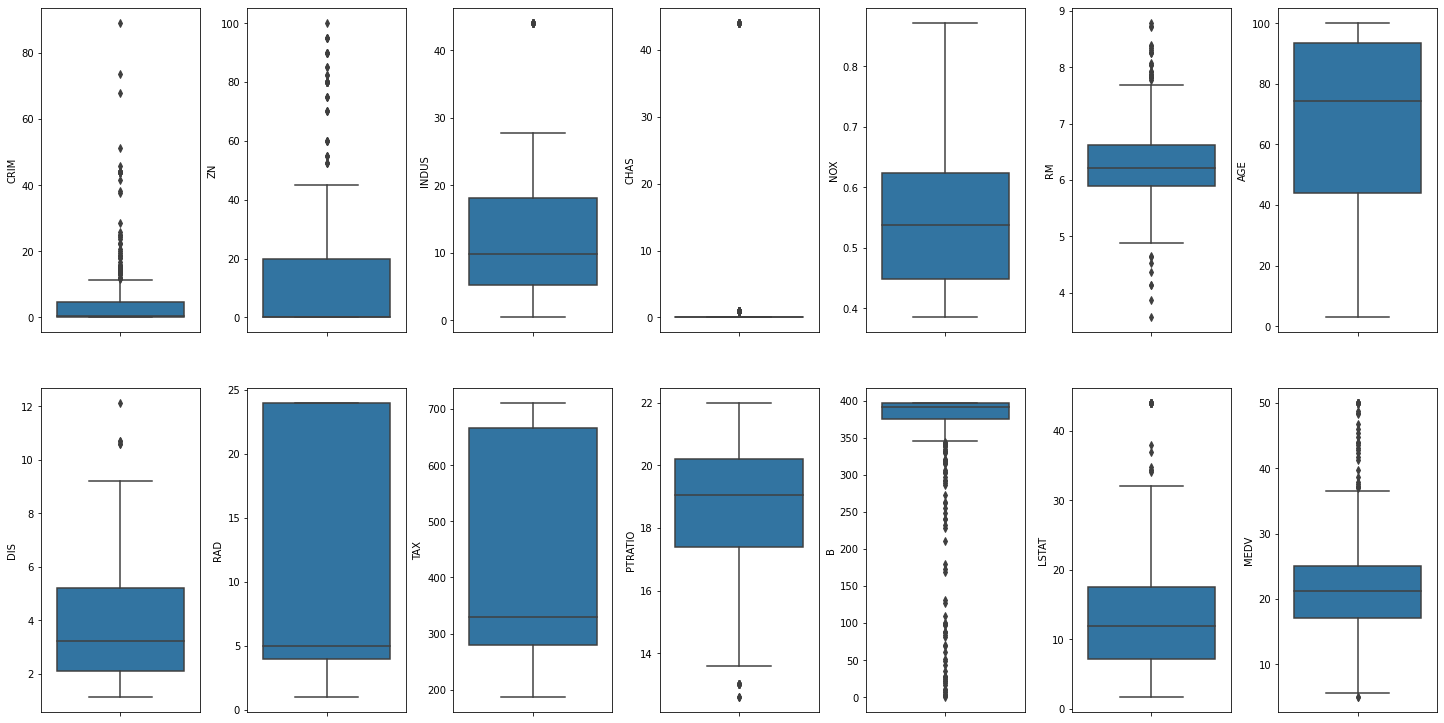

In [13]:
# create box plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)




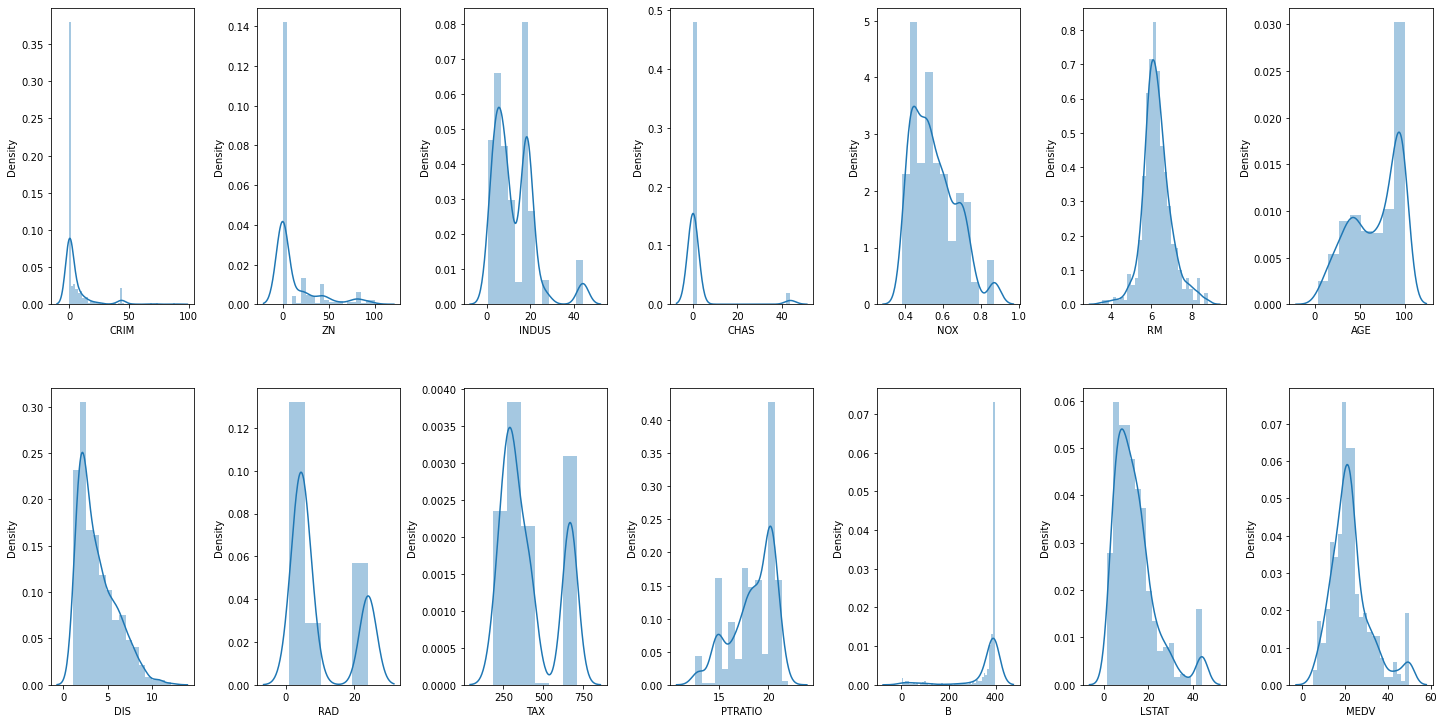

In [14]:
# create dist plot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [19]:
cols = ['CRIM', 'ZN', 'TAX', 'INDUS']
for col in cols:
    # find minimum and maximum of that column
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum) / (maximum - minimum)

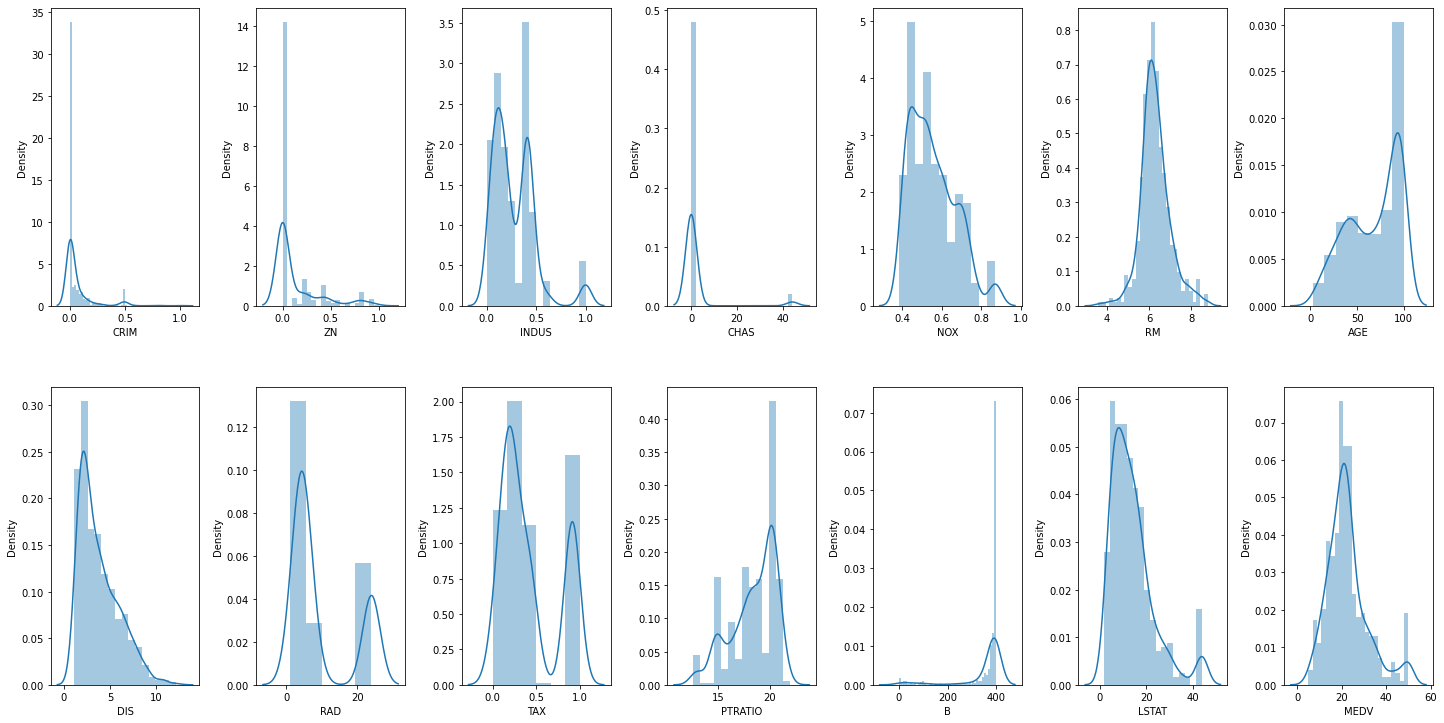

In [20]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [21]:
# standardization
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

# fit our data
scaled_cols = scalar.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()


,CRIM,ZN,TAX,INDUS
0,-0.448023,0.231024,-0.666608,-1.086910
1,-0.446215,-0.526142,-0.987329,-0.573393
2,-0.446217,-0.526142,-0.987329,-0.573393
3,-0.445779,-0.526142,-1.106115,-1.100934
4,-0.442620,-0.526142,-1.106115,-1.100934


In [22]:
for col in cols:
    df[col] = scaled_cols[col]

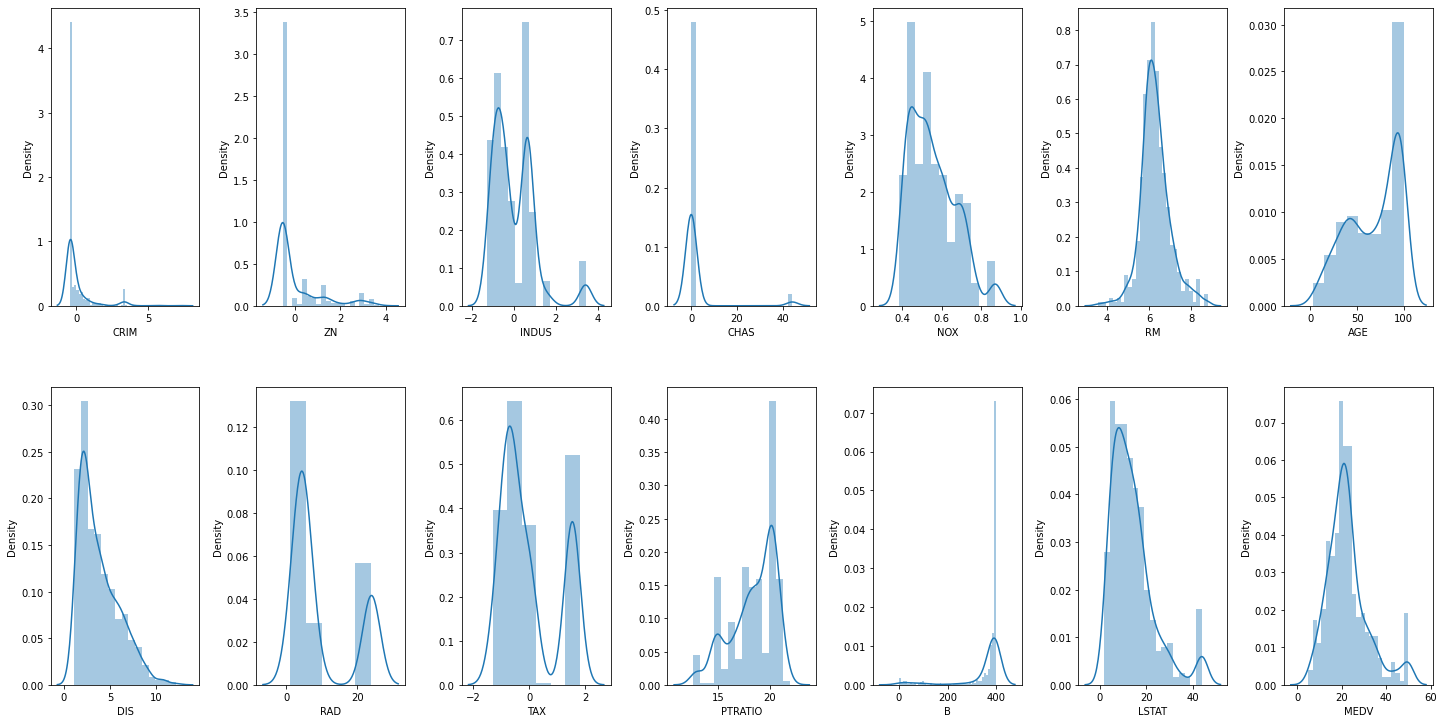

In [23]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

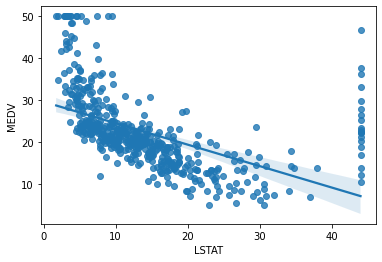

In [25]:
sns.regplot(y=df['MEDV'], x=df['LSTAT'])

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

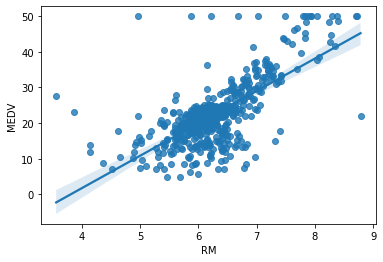

In [26]:
sns.regplot(y=df['MEDV'], x=df['RM'])


In [29]:
#INPUT SPLIT 
X = df.drop(columns=['MEDV', 'RAD'], axis=1)
y = df['MEDV']


In [30]:
#MODEL TRAINIG
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model.fit(x_train, y_train)
    
    # predict the training set
    pred = model.predict(x_test)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y_test, pred))
    print('CV Score:', cv_score)

Model Report
MSE: 11.236692913385825
CV Score: 38.48263696369637


<AxesSubplot:title={'center':'Feature Importance'}>

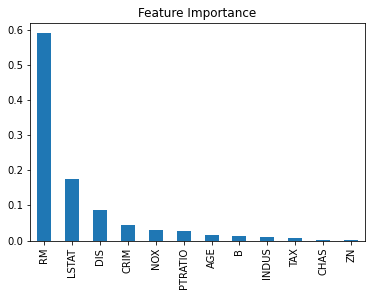

In [33]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')